In [25]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
import math
import json
from math import floor
from sklearn.metrics import r2_score

In [26]:
dataset = pd.read_csv('/content/AQI_delhi.csv')

In [27]:
dataset.head()

,Date,Delhi
0,2015-01-01,472.0
1,2015-01-02,454.0
2,2015-01-03,143.0
3,2015-01-04,319.0
4,2015-01-05,325.0


In [28]:
aqi_arr = dataset['Delhi'].to_numpy()
print(aqi_arr)

[472. 454. 143. ... 233. 114. 101.]


2009


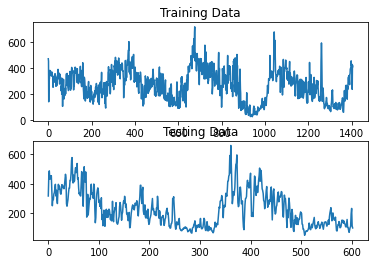

In [29]:
lengths=[0.7, 0.3]          
lookback=1                      

print(len(aqi_arr))

aqi_len=len(aqi_arr)
lim=[floor(aqi_len*lengths[0]),
     floor(aqi_len*(lengths[0]+lengths[1]))]

TrainingData=aqi_arr[:lim[0]]
TestData=aqi_arr[lim[0]:lim[1]]

fig, axs = plt.subplots(2)
axs[0].plot(TrainingData)
axs[0].set_title('Training Data')
axs[1].plot(TestData)
axs[1].set_title('Testing Data')

Xtrain,Ytrain=[],[]
Xtest,Ytest=[],[]


Xtraining=TrainingData[:-1]
Ytraining=TrainingData[1:]
for i in range(len(Xtraining)-lookback+1):
  Xtrain.append(Xtraining[i:i+lookback])
  Ytrain.append(Ytraining[i+lookback-1])

Xtesting=TestData[:-1]
Ytesting=TestData[1:]
for i in range(len(Xtesting)-lookback+1):
  Xtest.append(Xtesting[i:i+lookback])
  Ytest.append(Ytesting[i+lookback-1])

Xtrain=np.array(Xtrain)
Ytrain=np.array(Ytrain)
Xtest=np.array(Xtest)
Ytest=np.array(Ytest)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X_train=sc.fit_transform(Xtrain)
sc_X_test=sc.fit_transform(Xtest)


In [31]:
from sklearn.svm import SVR
reg_supportvector = SVR(kernel='linear')
reg_supportvector.fit(sc_X_train,Ytrain)

SVR(kernel='linear')

In [32]:
y_pred_supportvector = reg_supportvector.predict(sc_X_test)

In [33]:
X1=np.arange(0,len(Ytest))

Text(0.5, 1.0, 'SVM')

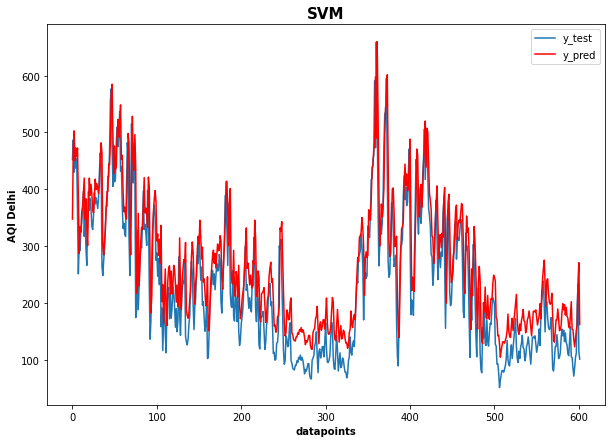

In [34]:
# plot forecasts against actual outcomes
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(Ytest,label = 'y_test')
ax.plot(y_pred_supportvector, color='red',label = 'y_pred')
ax.legend()
plt.ylabel('AQI Delhi',fontweight='bold')
plt.xlabel('datapoints',fontweight='bold')
plt.title('SVM',fontweight='bold',fontsize=15)

In [35]:

from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,median_absolute_error,r2_score

print("R2 Score = ",r2_score(Ytest, y_pred_supportvector))
print("Variance Score = ",explained_variance_score(Ytest, y_pred_supportvector))
print("\nMean Absolute Error (MAE) = ",mean_absolute_error(Ytest, y_pred_supportvector))
# print("Mean Squared Error (MSE) = ",mean_squared_error(Ytest, y_pred_supportvector))
print("Root Mean Squared Error (RMSE) = ",mean_squared_error(Ytest, y_pred_supportvector,squared=False))
print("Mean Absolute Percentage Error (MAPE) = ",mean_absolute_percentage_error(Ytest, y_pred_supportvector))
# print("Meadian Relative Absolute Error (MRAE) = ",median_absolute_error(Ytest, y_pred_supportvector))

R2 Score =  0.7286460965368988
Variance Score =  0.8312370144867273

Mean Absolute Error (MAE) =  49.63386572663575
Root Mean Squared Error (RMSE) =  62.139131167917355
Mean Absolute Percentage Error (MAPE) =  0.3023762808389217


In [36]:
SVM_res=[r2_score(Ytest, y_pred_supportvector),
         explained_variance_score(Ytest, y_pred_supportvector),
         mean_absolute_error(Ytest, y_pred_supportvector),
         mean_absolute_percentage_error(Ytest, y_pred_supportvector),
         mean_squared_error(Ytest, y_pred_supportvector,squared=False)]
print("SVM_res =",SVM_res)

SVM_res = [0.7286460965368988, 0.8312370144867273, 49.63386572663575, 0.3023762808389217, 62.139131167917355]
